<a href="https://colab.research.google.com/github/dsrojo10/PDS_UdeA/blob/main/Clase6_20_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase #6 20-Feb-23
### David Santiago Rojo C.

# Ejemplos monitor:

### Ejemplo 1. Correlación.

In [2]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

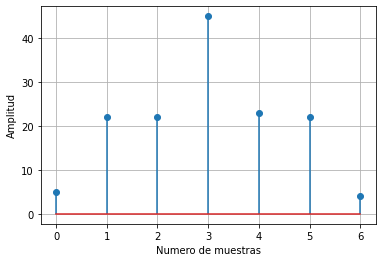

In [2]:
x = np.array([1, 4, 2, 5, 1])
y = np.array([4, 2, 5])
Rxy  = np.correlate(x, y, mode='full')

# Grafica de la correlación
plt.figure()
plt.stem(Rxy)
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

### Ejemplo 2. Polos y ROC

In [4]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

def zeropoles(b, a=1):
    # Genera una grafica con los polos y ceros de la función de transferencia
    # y la circunferencia unitaria.
    w,h = sp.freqz(b, a)
    sys1 = sp.lti(b, a)
    ang = np.arange(0.0, 2*np.pi, 0.01)
    xp = np.cos(ang)
    yp = np.sin(ang)
    plt.figure()
    plt.plot(xp, yp, '--')
    plt.plot(sys1.zeros.real, sys1.zeros.imag, 'o')
    plt.plot(sys1.poles.real, sys1.poles.imag, 'x')
    plt.grid()
    plt.show()

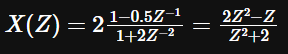

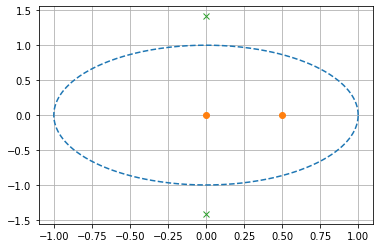

In [5]:
b = [2, -1 , 0] # Numerados
a = [1, 0, 2]   # Denominador
zeropoles(b, a)

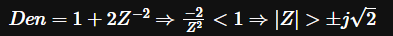

La anterior función es causal-inestable, ya que la región de convergencia se extiende del polo mas lejano hacia el infinito, esto se ve despues de hacer el análisis teórico, tambien es inestable porque los polos no estan dentro de la circunferencia unidad, por lo cual la ROC no contiene a la circunferencia unidad.

**Otro ejemplo:**

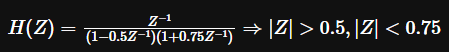

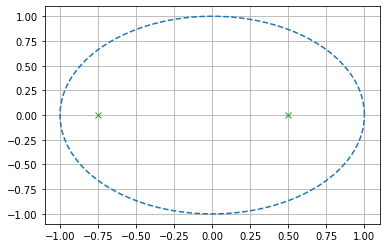

In [6]:
b = 1 # Numerados
a = [1, 1/4, -3/8]   # Denominador
zeropoles(b, a)

En este caso se puede ver que es No causal-inestable, porque la ROC no se extiende hacia el infinito, además, la ROC no contiene a la circunferencia unidad.

# Ejercicios mios:

Durante esta semana en clase, el profesor presento un ejemplo de correlación entre 2 señales, y propuso que este podria ser simulado como ejemplo para el repositorio.

$x(n)=[0,0,2,-1,3,7,1,2,-3,0,0]$
$y(n)=[0,0,1,-1,2,-2,4,1,-2,5,0]$

$R_{xy}=???$

**Resultado en clase:**
* $R_{xy}(1)=13$
* $R_{xy}(2)=-18$
* $R_{xy}(3)=16$
* $R_{xy}(4)=-7$
* $R_{xy}(5)=5$
* $R_{xy}(6)=-3$
* $R_{xy}(λ)=0 → λ ≥7$



[  0  10 -19   8  -3   0   0]


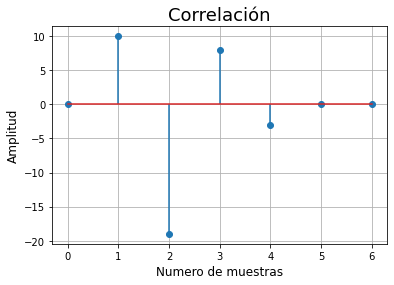

In [21]:
x = np.array([0,0,2,-1,3,7,1,2,-3,0,0])
y = np.array([0,0,1,-1,2,-2,4,1,-2,5,0])

offset = 7  # Desplazamiento de referencia
x_offset = x[offset:]  # Subvector de x a partir del desplazamiento
y_offset = y[offset:]  # Subvector de y a partir del desplazamiento
Rxy = np.correlate(x_offset, y_offset, mode='full')

print(Rxy)

plt.figure()
plt.stem(Rxy)
plt.title("Correlación", fontsize=18)
plt.xlabel('Numero de muestras', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid()
plt.show()

Si calculamos la correlación de esta forma podemos observar que no obtenemos el mismo resultado que en clase.

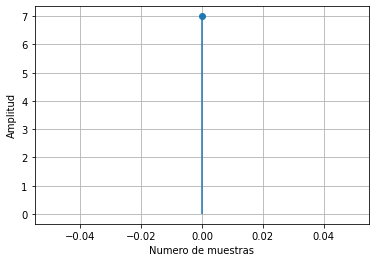

[7]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,0,2,-1,3,7,1,2,-3,0,0])
y = np.array([0,0,1,-1,2,-2,4,1,-2,5,0])

Rxy = np.correlate(x, y, mode='valid')

plt.figure()
plt.stem(Rxy)
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

print(Rxy)


De esta manera obtenemos el valor de λ

In [20]:
import numpy as np

x = np.array([0, 0, 2, -1, 3, 7, 1, 2, -3, 0, 0])
y = np.array([0, 0, 1, -1, 2, -2, 4, 1, -2, 5, 0])

Rxy = np.correlate(x, y, mode='full')

# Extraer la parte central de Rxy que corresponde a los valores deseados
Rxy = Rxy[len(x)//2:len(x)//2+len(x)-1]

print(Rxy)

[ 19  36 -14  33   0   7  13 -18  16  -7]
